*IMPORTING NECESSARY LIBRARIES*

In [197]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,f1_score,precision_score,recall_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

*LIST TO PLOT GRAPH FOR COMPARISON*

In [198]:
acc_list=[]
models=["DT","RFC","KNN","SVC","LR","TF"]

*DECISION TREE CLASSIFIER*

In [199]:
df=pd.read_json(r"C:\VS PROJECTS\SETTYL TF MODEL\dataset.json")
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
label=LabelEncoder()
X=label.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
df=pd.DataFrame({"IN":label.inverse_transform(X_test),"OUT":y_test,"EXP":y_pred})
print(df.head())
print(df.tail())
acc = accuracy_score(y_test,y_pred)
recall           =     recall_score(y_test, y_pred,average='macro')
precision        =     precision_score(y_test, y_pred,average='macro')
f1               =     f1_score(y_test, y_pred,average='macro')
roc_auc          =     roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')
print("Accuracy score:",acc)
print("Precision:",precision)
print("Recall Score:",recall)
print("F1-Score:",f1)
print("Roc-AUC:",roc_auc)
acc_list.append(acc)


                          precision    recall  f1-score   support

                 Arrival       0.96      0.96      0.96        23
               Departure       0.99      0.99      0.99        87
Empty Container Released       1.00      1.00      1.00        12
            Empty Return       1.00      1.00      1.00         9
                 Gate In       1.00      1.00      1.00        41
                Gate Out       1.00      1.00      1.00        48
              In-transit       1.00      1.00      1.00         4
        Inbound Terminal       1.00      1.00      1.00         2
        Loaded on Vessel       1.00      1.00      1.00        97
                Off Rail       1.00      1.00      1.00         8
                 On Rail       1.00      1.00      1.00        11
       Outbound Terminal       1.00      0.83      0.91         6
                 Port In       0.80      1.00      0.89         4
                Port Out       1.00      1.00      1.00         5
      Unl

*RANDOM FOREST CLASSIFIER*

In [200]:
df=pd.read_json(r"C:\VS PROJECTS\SETTYL TF MODEL\dataset.json")
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
label=LabelEncoder()
X=label.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
model=RandomForestClassifier(n_estimators=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))
df=pd.DataFrame({"IN":label.inverse_transform(X_test),"OUT":y_test,"EXP":y_pred})
print(df.head())
print(df.tail())
acc = accuracy_score(y_test,y_pred)
recall           =     recall_score(y_test, y_pred,average='macro')
precision        =     precision_score(y_test, y_pred,average='macro')
f1               =     f1_score(y_test, y_pred,average='macro')
roc_auc          =     roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')
print("Accuracy score:",acc)
print("Precision:",precision)
print("Recall Score:",recall)
print("F1-Score:",f1)
print("Roc-AUC:",roc_auc)
acc_list.append(acc)

                          precision    recall  f1-score   support

                 Arrival       1.00      1.00      1.00        15
               Departure       1.00      1.00      1.00        87
Empty Container Released       1.00      1.00      1.00        11
            Empty Return       1.00      1.00      1.00        12
                 Gate In       1.00      1.00      1.00        40
                Gate Out       1.00      1.00      1.00        41
              In-transit       1.00      1.00      1.00         4
        Inbound Terminal       1.00      1.00      1.00         3
        Loaded on Vessel       1.00      1.00      1.00       108
                Off Rail       1.00      1.00      1.00        11
                 On Rail       1.00      1.00      1.00         8
       Outbound Terminal       1.00      1.00      1.00         5
                 Port In       1.00      1.00      1.00         7
                Port Out       1.00      1.00      1.00         7
      Unl

*KNN CLASSIFIER*

In [201]:
df=pd.read_json(r"C:\VS PROJECTS\SETTYL TF MODEL\dataset.json")
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
label=LabelEncoder()
X=label.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
model=KNeighborsClassifier(n_neighbors=5, metric=distance.sqeuclidean)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))
df=pd.DataFrame({"IN":label.inverse_transform(X_test),"OUT":y_test,"EXP":y_pred})
print(df.head())
print(df.tail())
acc = accuracy_score(y_test,y_pred)
recall           =     recall_score(y_test, y_pred,average='macro')
precision        =     precision_score(y_test, y_pred,average='macro')
f1               =     f1_score(y_test, y_pred,average='macro')
roc_auc          =     roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')
print("Accuracy score:",acc)
print("Precision:",precision)
print("Recall Score:",recall)
print("F1-Score:",f1)
print("Roc-AUC:",roc_auc)
acc_list.append(acc)

                          precision    recall  f1-score   support

                 Arrival       0.89      0.94      0.91        17
               Departure       0.99      0.99      0.99        97
Empty Container Released       1.00      1.00      1.00        14
            Empty Return       1.00      1.00      1.00        14
                 Gate In       1.00      1.00      1.00        47
                Gate Out       1.00      1.00      1.00        46
              In-transit       1.00      0.75      0.86         4
        Inbound Terminal       1.00      1.00      1.00         2
        Loaded on Vessel       1.00      0.99      0.99        94
                Off Rail       1.00      1.00      1.00         6
                 On Rail       1.00      0.89      0.94         9
       Outbound Terminal       0.50      1.00      0.67         4
                 Port In       1.00      0.33      0.50         3
                Port Out       1.00      1.00      1.00         3
      Unl

*SUPPORT VECTOR CLASSIFIER - SVC*

In [202]:
df=pd.read_json(r"C:\VS PROJECTS\SETTYL TF MODEL\dataset.json")
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
label=LabelEncoder()
X=label.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
model=SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))
df=pd.DataFrame({"IN":label.inverse_transform(X_test),"OUT":y_test,"EXP":y_pred})
print(df.head())
print(df.tail())
acc = accuracy_score(y_test,y_pred)
recall           =     recall_score(y_test, y_pred,average='macro')
precision        =     precision_score(y_test, y_pred,average='macro')
f1               =     f1_score(y_test, y_pred,average='macro')
print("Accuracy score:",acc)
print("Precision:",precision)
print("Recall Score:",recall)
print("F1-Score:",f1)
print("Roc-AUC:",roc_auc)
acc_list.append(acc)

                          precision    recall  f1-score   support

                 Arrival       0.22      0.15      0.18        26
               Departure       0.86      0.87      0.87        93
Empty Container Released       0.86      0.63      0.73        19
            Empty Return       0.00      0.00      0.00         0
                 Gate In       0.00      0.00      0.00        14
                Gate Out       0.98      0.36      0.52       112
              In-transit       0.00      0.00      0.00         0
        Inbound Terminal       0.00      0.00      0.00         0
        Loaded on Vessel       0.78      0.70      0.74       102
                Off Rail       0.00      0.00      0.00         1
                 On Rail       0.00      0.00      0.00         0
       Outbound Terminal       0.00      0.00      0.00         0
                 Port In       0.00      0.00      0.00         0
                Port Out       0.00      0.00      0.00         0
      Unl

*LOGISTIC REGRESSION*

In [203]:
df=pd.read_json(r"C:\VS PROJECTS\SETTYL TF MODEL\dataset.json")
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
label=LabelEncoder()
X=label.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))
df=pd.DataFrame({"IN":label.inverse_transform(X_test),"OUT":y_test,"EXP":y_pred})
print(df.head())
print(df.tail())
acc = accuracy_score(y_test,y_pred)
recall           =     recall_score(y_test, y_pred,average='macro')
precision        =     precision_score(y_test, y_pred,average='macro')
f1               =     f1_score(y_test, y_pred,average='macro')
roc_auc          =     roc_auc_score(y_test,model.predict_proba(X_test),multi_class='ovr')
print("Accuracy score:",acc)
print("Precision:",precision)
print("Recall Score:",recall)
print("F1-Score:",f1)
print("Roc-AUC:",roc_auc)
acc_list.append(acc)

                          precision    recall  f1-score   support

                 Arrival       0.00      0.00      0.00         0
               Departure       0.96      0.72      0.82       134
Empty Container Released       0.00      0.00      0.00         0
            Empty Return       0.00      0.00      0.00         0
                 Gate In       0.00      0.00      0.00         0
                Gate Out       0.00      0.00      0.00         2
              In-transit       0.00      0.00      0.00         0
        Inbound Terminal       0.00      0.00      0.00         0
        Loaded on Vessel       0.91      0.38      0.53       231
                Off Rail       0.00      0.00      0.00         0
                 On Rail       0.00      0.00      0.00         0
       Outbound Terminal       0.00      0.00      0.00         0
                 Port In       0.00      0.00      0.00         0
                Port Out       0.00      0.00      0.00         0
      Unl

*TENSOR FLOW*

In [204]:
df=pd.read_json(r"C:\VS PROJECTS\SETTYL TF MODEL\dataset.json")
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
label=LabelEncoder()
X=label.fit_transform(X)
y=label.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=1))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=50,validation_split=0.3)
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_pred,y_test))
acc = accuracy_score(y_test,y_pred)
recall           =     recall_score(y_test, y_pred,average='macro')
precision        =     precision_score(y_test, y_pred,average='macro')
f1               =     f1_score(y_test, y_pred,average='macro')
print("Accuracy score:",acc)
print("Precision:",precision)
print("Recall Score:",recall)
print("F1-Score:",f1)
print("Roc-AUC:",roc_auc)
acc_list.append(acc)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2307 - loss: 0.0000e+00 - val_accuracy: 0.2879 - val_loss: 0.0000e+00
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2345 - loss: nan - val_accuracy: 0.0350 - val_loss: nan
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0373 - loss: nan - val_accuracy: 0.0350 - val_loss: nan
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0524 - loss: nan - val_accuracy: 0.0350 - val_loss: nan
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0631 - loss: nan - val_accuracy: 0.0350 - val_loss: nan
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0526 - loss: nan - val_accuracy: 0.0350 - val_loss: nan
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0493 - loss: nan - val_accuracy: 0.0350 - val_loss: nan
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0523 - loss: nan - val_accuracy: 0.0350 - val_loss: nan
Epoch 9/50
19/19 ━━━━━━━━━

*PLOTTING GRAPH*

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


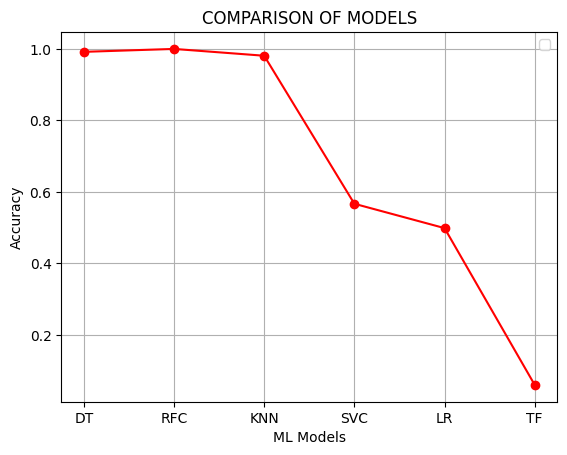

In [208]:
plt.plot(models,acc_list,color='red', marker='o')
plt.title("COMPARISON OF MODELS")
plt.xlabel("ML Models")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()